# Pattern recognition and Classification using Keras and the IRIS data set
Data set : https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

2022-04-14 11:49:15.599987: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-14 11:49:15.600014: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Preparing the Data :
### Loading the data set from scikit-learn :
* We set `return_X_y` on "True" to separate the data from it's labels, this method gives us an array with this form:
[[Data], [Labels]].

In [3]:
data = load_iris(return_X_y = True)

In [4]:
targets = list(load_iris().target_names)
targets

['setosa', 'versicolor', 'virginica']

In [5]:
features = list(load_iris().feature_names)
features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Putting the data in a DataFrame:
* This helps us better manipulate our data

In [6]:
DataFeatures = pd.DataFrame(data[0])
DataFeatures.columns = features
DataFeatures.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
DataLabels = pd.DataFrame(data[1])
DataLabels.head()

,0
0,0
1,0
2,0
3,0
4,0


* As We can see, our data set is not biased, since we have an equal count for each class

In [8]:
DataLabels.value_counts()

0    50
1    50
2    50
dtype: int64

## Principal component analysis (PCA):

In [9]:
pca = PCA()
pca.fit(DataFeatures)

PCA()

In [10]:
DataFeatures.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


* We can see from the correlation matrix above and from the explained variance tha some of the columns are heavily correlated and that there is a possibility to reduce the number of columns in the data set without losing much information

In [11]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

* 2 columns of the data set's total 4 holds almost 98% of the total information, which means that by reducing the whole data set to 2 columns, we will only lose about 2% of the total information

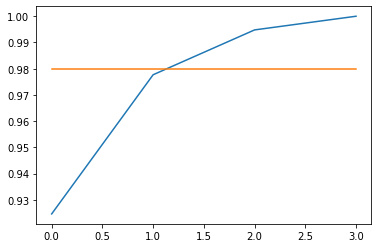

In [12]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.plot([0, 3], [0.98, 0.98])

## Exploring the data after decomposition :
* First of all, I started by making two seperate DataFrames, one for the petal dimensions and the other is for sepal dimensions

In [13]:
DataPetals = pd.DataFrame({
    "petal length" : DataFeatures[features[2]],
    "petal width" : DataFeatures[features[3]]
})
DataPetals.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [14]:
DataSepals = pd.DataFrame({
    "sepal length" : DataFeatures[features[0]],
    "sepal width" : DataFeatures[features[1]]
})
DataSepals.head()

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


* Then we scatter plot both DataFrames in seperate graphs while coloring each point to allow us to distinguish each class

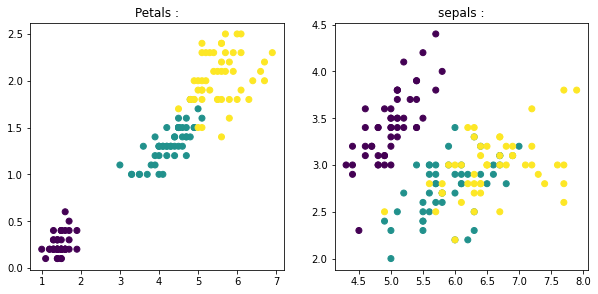

In [15]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.scatter(DataPetals["petal length"], DataPetals["petal width"], c = DataLabels)
plt.title("Petals :")

plt.subplot(222)
plt.scatter(DataSepals["sepal length"], DataSepals["sepal width"], c = DataLabels)
plt.title("sepals :")

plt.show()

* we can see clearly from the graph above that the Petals dimensions are more organised and it is easier to distinguish between each class

## Model Creation and training :
### Preparing the training and testing data:

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(DataPetals, DataLabels, test_size=0.2, random_state=1)

* separating the labels data into three seperate columns :<br>
    - [0] => [1, 0, 0]
    - [1] => [0, 1, 0]
    - [2] => [0, 0, 1]

In [17]:
Y_train = pd.get_dummies(Y_train, columns=[0], prefix='', prefix_sep='')
Y_train.describe()

,0,1,2
count,120.000000,120.000000,120.000000
mean,0.325000,0.308333,0.366667
std,0.470339,0.463741,0.483915
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


### Creating and compiling the model :

In [18]:
Model = Sequential([
    Input(shape=(2,)),
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(3, activation="softmax")
])

Model.compile(loss="categorical_crossentropy",
              optimizer = Adam(learning_rate = 0.05),
             metrics = ["accuracy"])

Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


2022-04-14 11:49:18.812084: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-14 11:49:18.812161: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-14 11:49:18.812209: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (chiheb-HP): /proc/driver/nvidia/version does not exist
2022-04-14 11:49:18.812701: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
Model.fit(
    X_train, 
    Y_train,
    epochs = 100,
    batch_size = 32,
    verbose = 0,
)

### Estimating our model's accuracy:
* Since we don't have that much data in hand, the accuracy calculated here is just an approximation of the model's real accuracy.

In [20]:
acc = 0
res = pd.DataFrame(tf.argmax(Model.predict(X_test),1))
for i in range(0, res.shape[0]) :
    if np.array(res)[i] == np.array(Y_test)[i] : acc +=1
acc = acc/res.shape[0]
acc

0.9666666666666667

### Plotting the original and predicted data side by side :

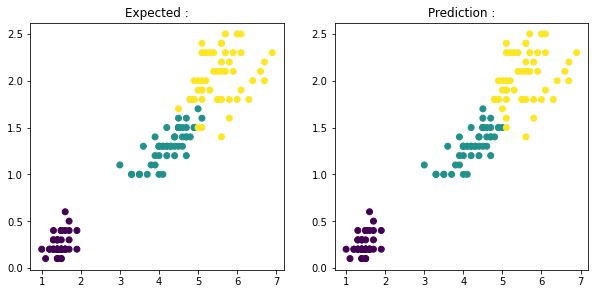

In [21]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.scatter(DataPetals["petal length"], DataPetals["petal width"], c = DataLabels)
plt.title("Expected :")

plt.subplot(222)
plt.scatter(DataPetals["petal length"], DataPetals["petal width"], c = np.array(tf.argmax(Model.predict(DataPetals), 1)))
plt.title("Prediction :")

plt.show()

In [22]:
Model.save("IrisModel")

2022-04-14 11:49:20.564236: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: IrisModel/assets
